In [64]:
## EDA libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import shap

## feature engineering libraries
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression, mutual_info_regression
from sklearn.model_selection import train_test_split

## model preparation libraries
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor

## model evaluation libraries
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
from sklearn import metrics
from sklearn.model_selection import RepeatedKFold

## model hyperparameter tuning
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

import joblib
%matplotlib inline

In [65]:
data = pd.read_csv("WildBlueberryPollinationSimulationData.csv")
data.head()

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


#### EDA 

In [66]:
data.drop(["Row#"], axis=1, inplace=True )
data.head()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,16.0,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,1.0,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,16.0,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.75,0.25,0.25,0.25,94.6,57.2,79.0,68.2,33.0,55.9,1.0,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.75,0.25,0.25,0.25,86.0,52.0,71.9,62.0,30.0,50.8,24.0,0.39,0.354413,0.382703,28.873714,3436.493543


In [67]:
# Checking the missing values
data.isnull().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
MaxOfUpperTRange        0
MinOfUpperTRange        0
AverageOfUpperTRange    0
MaxOfLowerTRange        0
MinOfLowerTRange        0
AverageOfLowerTRange    0
RainingDays             0
AverageRainingDays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [68]:
data.describe()

,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000
mean,18.767696,0.417133,0.282389,0.468817,0.562062,82.277091,49.700515,68.723037,59.309395,28.690219,48.613127,18.309292,0.320000,0.502121,0.445983,36.122432,6012.849165
std,6.999063,0.978904,0.066343,0.161052,0.169119,9.193745,5.595769,7.676984,6.647760,3.209547,5.417072,12.124226,0.171279,0.079445,0.040333,4.377889,1356.955318
min,10.000000,0.000000,0.000000,0.000000,0.000000,69.700000,39.000000,58.200000,50.200000,24.300000,41.200000,1.000000,0.060000,0.192732,0.311921,22.079199,1637.704022
25%,12.500000,0.250000,0.250000,0.380000,0.500000,77.400000,46.800000,64.700000,55.800000,27.000000,45.800000,3.770000,0.100000,0.454725,0.416281,33.116091,5124.854901
50%,12.500000,0.250000,0.250000,0.500000,0.630000,86.000000,52.000000,71.900000,62.000000,30.000000,50.800000,16.000000,0.260000,0.508297,0.445587,36.166044,6107.382466
75%,25.000000,0.500000,0.380000,0.630000,0.750000,89.000000,52.000000,71.900000,66.000000,30.000000,50.800000,24.000000,0.390000,0.561297,0.476149,39.239668,7022.189731
max,40.000000,18.430000,0.585000,0.750000,0.750000,94.600000,57.200000,79.000000,68.200000,33.000000,55.900000,34.000000,0.560000,0.652144,0.535660,46.585105,8969.401842


In [69]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 777 entries, 0 to 776
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   MaxOfUpperTRange      777 non-null    float64
 6   MinOfUpperTRange      777 non-null    float64
 7   AverageOfUpperTRange  777 non-null    float64
 8   MaxOfLowerTRange      777 non-null    float64
 9   MinOfLowerTRange      777 non-null    float64
 10  AverageOfLowerTRange  777 non-null    float64
 11  RainingDays           777 non-null    float64
 12  AverageRainingDays    777 non-null    float64
 13  fruitset              777 non-null    float64
 14  fruitmass             777 non-null    float64
 15  seeds                 7

In [70]:
data.nunique()

clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
MaxOfUpperTRange          5
MinOfUpperTRange          5
AverageOfUpperTRange      5
MaxOfLowerTRange          5
MinOfLowerTRange          5
AverageOfLowerTRange      5
RainingDays               5
AverageRainingDays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

<AxesSubplot:xlabel='yield', ylabel='Count'>

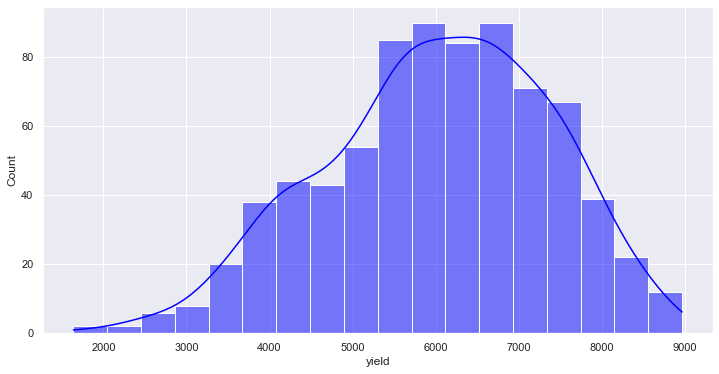

In [71]:
fig, ax = plt.subplots(figsize =(12, 6))
sns.histplot(data, x="yield", kde=True, color= "blue")

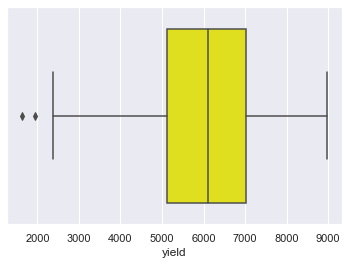

In [72]:
# Creating box-plot for yield coloumn
ax = sns.boxplot(x=data["yield"], color= "yellow")

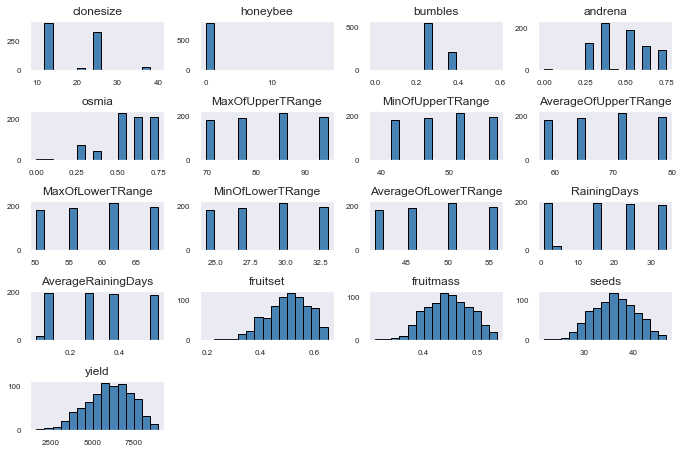

In [73]:
data.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
           xlabelsize=8, ylabelsize=8, grid=False)    
plt.tight_layout(rect=(0, 0, 1.6, 1.6))   

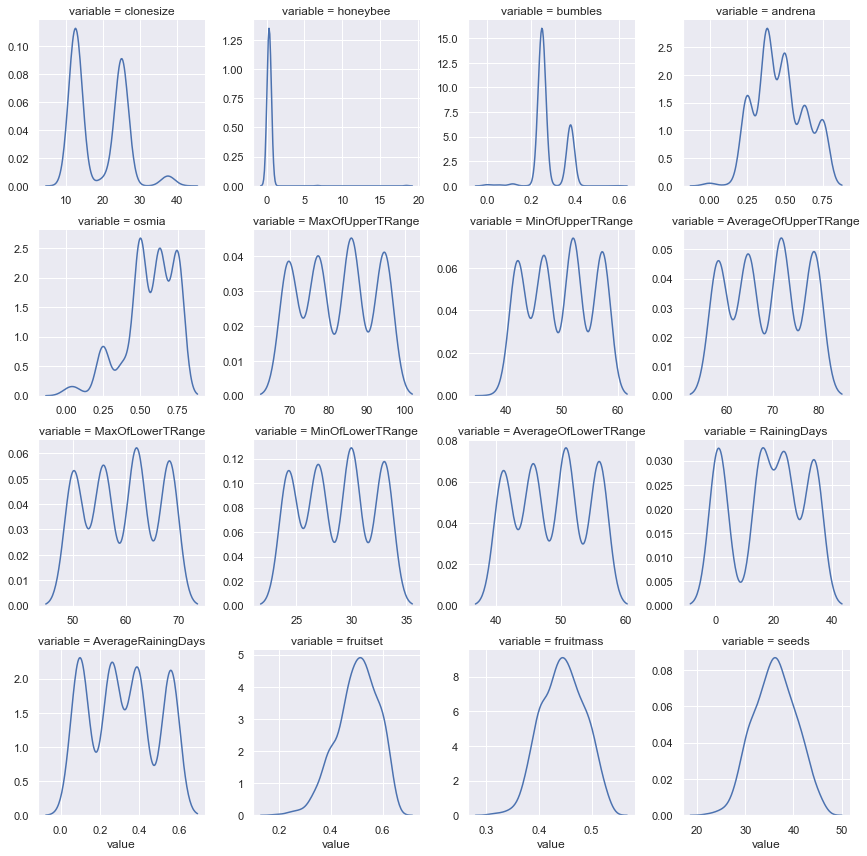

In [74]:
unpivot = pd.melt(data, data.describe().columns[-1], data.describe().columns[:-1])
g = sns.FacetGrid(unpivot, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.kdeplot, "value")

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.


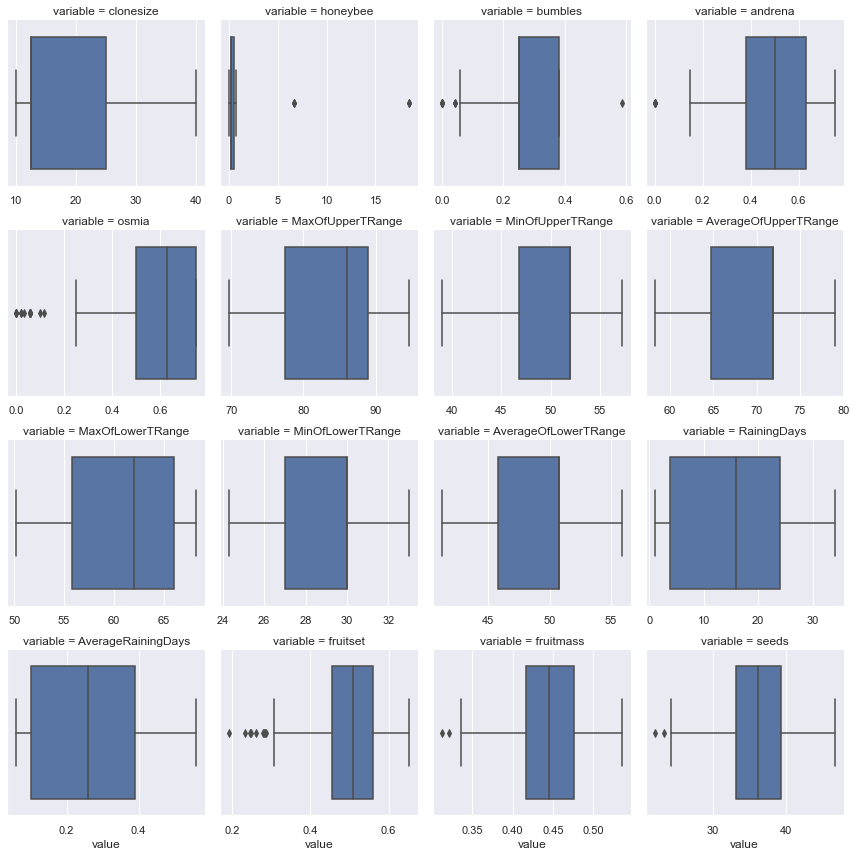

In [75]:
unpivot = pd.melt(data, data.describe().columns[-1], data.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

<AxesSubplot:>

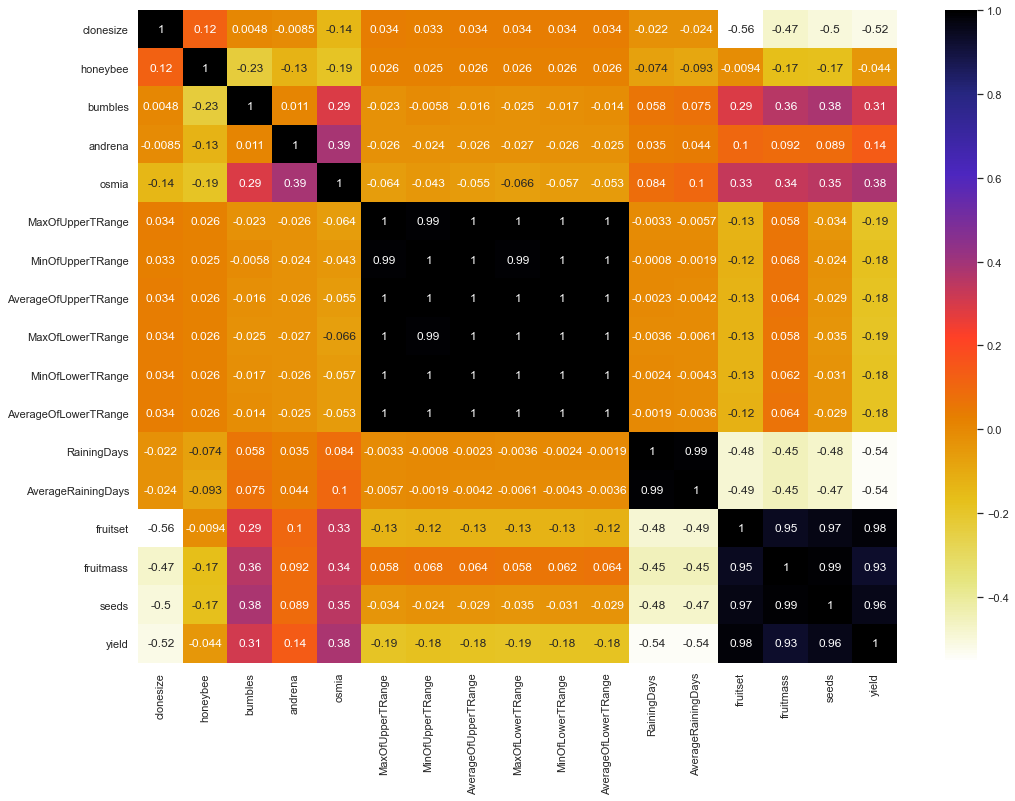

In [76]:
# Correlation Matrix Heatmap
plt.figure(figsize=(17,12))
sns.set()
sns.heatmap(data.corr(), annot=True, cmap=plt.cm.CMRmap_r)

In [77]:
data.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'MaxOfUpperTRange', 'MinOfUpperTRange', 'AverageOfUpperTRange',
       'MaxOfLowerTRange', 'MinOfLowerTRange', 'AverageOfLowerTRange',
       'RainingDays', 'AverageRainingDays', 'fruitset', 'fruitmass', 'seeds',
       'yield'],
      dtype='object')

In [78]:
bbry_data_process = data.drop(columns=['MaxOfUpperTRange', 'MinOfUpperTRange', 'MaxOfLowerTRange', 'MinOfLowerTRange', 'RainingDays', 'honeybee'])
bbry_data_process

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...
772,10.0,0.117,0.409,0.058,71.9,50.8,0.06,0.486815,0.428012,33.447471,5333.873335
773,40.0,0.117,0.409,0.058,71.9,50.8,0.06,0.342841,0.377915,28.462005,3373.436842
774,20.0,0.117,0.409,0.058,71.9,50.8,0.39,0.404617,0.401670,30.748240,4203.027624
775,20.0,0.117,0.409,0.058,65.6,45.3,0.06,0.401538,0.399935,30.582161,4166.299735


In [79]:
X = bbry_data_process.drop(columns=['yield'])
y = bbry_data_process[['yield']]

In [80]:
X.head()

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,37.5,0.25,0.25,0.25,71.9,50.8,0.26,0.410652,0.408159,31.678898
1,37.5,0.25,0.25,0.25,71.9,50.8,0.10,0.444254,0.425458,33.449385
2,37.5,0.25,0.25,0.25,79.0,55.9,0.26,0.383787,0.399172,30.546306
3,37.5,0.25,0.25,0.25,79.0,55.9,0.10,0.407564,0.408789,31.562586
4,37.5,0.25,0.25,0.25,71.9,50.8,0.39,0.354413,0.382703,28.873714


In [81]:
y.head()

,yield
0,3813.165795
1,4947.605663
2,3866.798965
3,4303.943030
4,3436.493543


In [82]:
#Calculating Inter-Quartile Range(IQR)
Q1 = X.quantile(0.25)
Q3 = X.quantile(0.75)
IQR = Q3 - Q1
print(IQR)


clonesize               12.500000
bumbles                  0.130000
andrena                  0.250000
osmia                    0.250000
AverageOfUpperTRange     7.200000
AverageOfLowerTRange     5.000000
AverageRainingDays       0.290000
fruitset                 0.106571
fruitmass                0.059869
seeds                    6.123577
dtype: float64


In [83]:
bbry_data_iqr = bbry_data_process[~((bbry_data_process < (Q1 - 1.5 * IQR)) | (bbry_data_process > (Q3 + 1.5 * IQR))).any(axis=1)]
bbry_data_iqr.shape

Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`


(752, 11)

In [84]:
bbry_data_iqr = bbry_data_iqr.reset_index().drop(["index"], axis=1)
bbry_data_iqr

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.25,0.25,0.25,71.9,50.8,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.25,0.25,0.25,71.9,50.8,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.25,0.25,0.25,79.0,55.9,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.25,0.25,0.25,79.0,55.9,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.25,0.25,0.25,71.9,50.8,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...
747,25.0,0.38,0.63,0.50,64.7,45.8,0.10,0.558394,0.478666,39.448650,7184.013843
748,25.0,0.38,0.63,0.50,58.2,41.2,0.26,0.494678,0.429703,34.784888,6292.960756
749,25.0,0.38,0.63,0.50,58.2,41.2,0.10,0.502842,0.430369,35.185971,6374.444297
750,25.0,0.38,0.63,0.50,64.7,45.8,0.39,0.513889,0.458966,37.209554,6180.951419


Using the boxplot function without specifying `order` is likely to produce an incorrect plot.


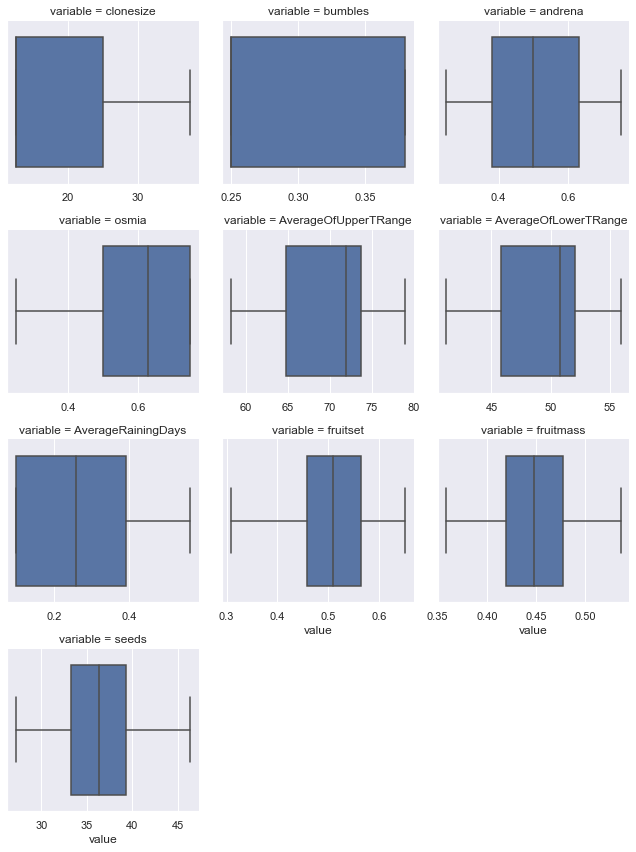

In [85]:
unpivot = pd.melt(bbry_data_iqr, bbry_data_iqr.describe().columns[-1], bbry_data_iqr.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=3, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [86]:
z = np.abs(stats.zscore(bbry_data_process))
print(z)

[[2.67812564 0.4885117  1.35954903 ... 0.93841323 1.01564827 1.62208748]
 [2.67812564 0.4885117  1.35954903 ... 0.50923815 0.61097218 0.7855304 ]
 [2.67812564 0.4885117  1.35954903 ... 1.16136881 1.27452236 1.58253738]
 ...
 [0.17618037 2.4945233  0.37165479 ... 1.0994045  1.22836665 1.33459611]
 [0.17618037 2.4945233  0.37165479 ... 1.14243699 1.26632705 1.36167994]
 [0.17618037 2.4945233  0.37165479 ... 1.33180188 1.45822756 1.52624822]]


In [87]:
bbry_data_zscore = bbry_data_process[(z < 3).all(axis=1)]
bbry_data_zscore.shape

(764, 11)

Using the boxplot function without specifying `order` is likely to produce an incorrect plot.


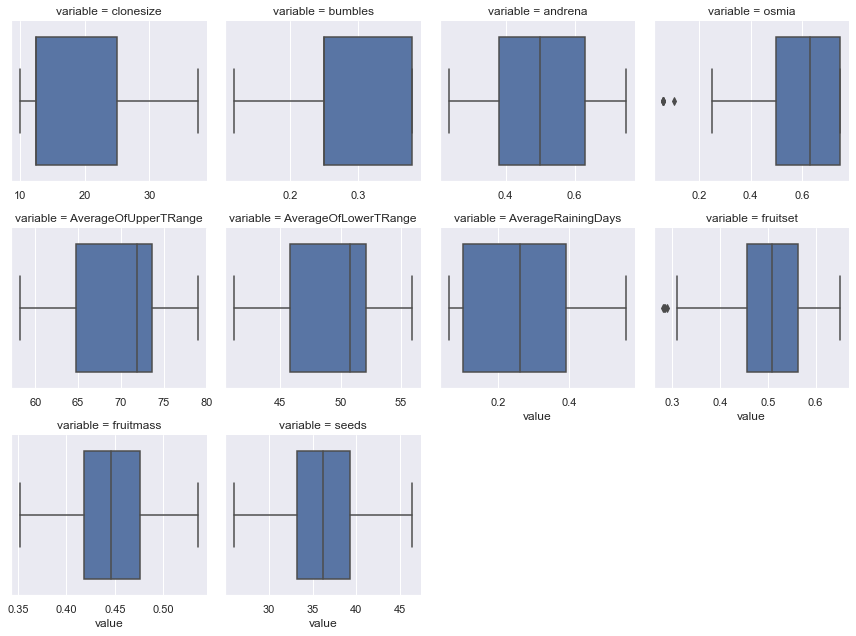

In [88]:
unpivot = pd.melt(bbry_data_zscore, bbry_data_zscore.describe().columns[-1], bbry_data_zscore.describe().columns[:-1])

g = sns.FacetGrid(unpivot, col="variable", col_wrap=4, sharex=False, sharey=False)
g.map(sns.boxplot, "value")

plt.show()

In [89]:
bbry_data_process = bbry_data_zscore.reset_index().drop(["index"], axis=1)
bbry_data_process

,clonesize,bumbles,andrena,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,37.5,0.250,0.250,0.250,71.9,50.8,0.26,0.410652,0.408159,31.678898,3813.165795
1,37.5,0.250,0.250,0.250,71.9,50.8,0.10,0.444254,0.425458,33.449385,4947.605663
2,37.5,0.250,0.250,0.250,79.0,55.9,0.26,0.383787,0.399172,30.546306,3866.798965
3,37.5,0.250,0.250,0.250,79.0,55.9,0.10,0.407564,0.408789,31.562586,4303.943030
4,37.5,0.250,0.250,0.250,71.9,50.8,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...
759,20.0,0.293,0.234,0.058,71.9,50.8,0.06,0.497503,0.453339,36.633376,5449.421199
760,10.0,0.117,0.409,0.058,71.9,50.8,0.06,0.486815,0.428012,33.447471,5333.873335
761,20.0,0.117,0.409,0.058,71.9,50.8,0.39,0.404617,0.401670,30.748240,4203.027624
762,20.0,0.117,0.409,0.058,65.6,45.3,0.06,0.401538,0.399935,30.582161,4166.299735


# Feature Selection



> As a part of which, we will perform feature selection.

> We have created 2 splits on Dataset, and each will be analysed on the importance of either **Mutual Information gain** or **Correlation Regression** values


In [90]:
def select_features_corr_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_corr = SelectKBest(score_func=f_regression, k='all')
    else:
        fs_corr = SelectKBest(score_func=f_regression, k = x)
    fs_corr.fit(X_train, y_train)
    X_train_fs = fs_corr.transform(X_train)
    X_test_fs = fs_corr.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_corr

def select_features_infogain_based(X_train, y_train, X_test, x="all"):
    if type(x) == str:
        fs_info = SelectKBest(score_func=mutual_info_regression, k='all')
    else:
        fs_info = SelectKBest(score_func=mutual_info_regression, k=x)
    fs_info.fit(X_train, y_train)
    X_train_fs = fs_info.transform(X_train)
    X_test_fs = fs_info.transform(X_test)
    
    return X_train_fs, X_test_fs, fs_info

In [91]:
X = bbry_data_process.drop(["yield"], axis=1)
y = bbry_data_process['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs_corr, X_test_fs_corr, fs_corr = select_features_corr_based(X_train, y_train, X_test)
X_train_fs_info, X_test_fs_info, fs_info = select_features_infogain_based(X_train, y_train, X_test)

**I would have to perform many folds of tuning on the decided dataset, hence I would have to choose either one option of the below**
​
* info-gain vs correlation
​
​
The **KSelection score plot** describes a good behavior of the **Information Gain Values**. Hence, all the dataset will be based on the same

Feature 0: 175.463722
Feature 1: 35.414625
Feature 2: 8.092982
Feature 3: 95.866044
Feature 4: 23.685723
Feature 5: 23.512387
Feature 6: 265.725911
Feature 7: 18027.130769
Feature 8: 3685.065541
Feature 9: 8199.278441


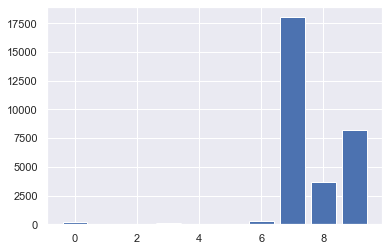

Feature 0: 0.171179
Feature 1: 0.076644
Feature 2: 0.036407
Feature 3: 0.111131
Feature 4: 0.127531
Feature 5: 0.127380
Feature 6: 0.229602
Feature 7: 2.052741
Feature 8: 1.629359
Feature 9: 1.691315


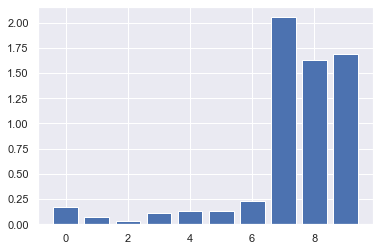

In [92]:
def fs_score_plot(fs_func):
    
    for i in range(len(fs_func.scores_)):
        print('Feature %d: %f' % (i, fs_func.scores_[i]))
    # plot the scores
    plt.bar([i for i in range(len(fs_func.scores_))], fs_func.scores_)
    plt.show()
    
fs_score_plot(fs_corr)
fs_score_plot(fs_info)

# Modelling 

<p style="font-size: 17px;"> <b> We will now train the model on top 9 features, using both the splits of dataset, <br>and check the metrics of the same on <span style="color: purple;"> 4 Models </span> </b></p>

* Linear Regression
* Random Forest
* Decision Tree
* XGBoost

In [93]:
X = bbry_data_process.drop(["yield"], axis=1)
y = bbry_data_process['yield']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

X_train_fs, X_test_fs, fs_info = select_features_infogain_based(X_train, y_train, X_test, x=9)

### LinearRegression

In [94]:
lreg = LinearRegression()

lreg.fit(X_train_fs, y_train)

yhat = lreg.predict(X_test_fs)

In [95]:
mae_linear = mean_absolute_error(y_test, yhat)
mse_linear = mean_squared_error(y_test, yhat)
rmse_linear = np.sqrt(mse_linear)
rsq_linear = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_linear)
print('MSE: %.3f' % mse_linear)
print('RMSE: %.3f' % rmse_linear)
print('R-Square: %.3f' % rsq_linear)

MAE: 103.080
MSE: 19166.573
RMSE: 138.443
R-Square: 0.988


### RandomForest Regression

In [96]:
rf = RandomForestRegressor()

rf.fit(X_train_fs, y_train)
    
yhat = rf.predict(X_test_fs)

In [97]:
mae_rf = mean_absolute_error(y_test, yhat)
mse_rf = mean_squared_error(y_test, yhat)
rmse_rf = np.sqrt(mse_rf)
rsq_rf = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_rf)
print('MSE: %.3f' % mse_rf)
print('RMSE: %.3f' % rmse_rf)
print('R-Square: %.3f' % rsq_rf)

MAE: 119.004
MSE: 24368.332
RMSE: 156.104
R-Square: 0.985


### Decision Tree Regression

In [98]:
dtree = DecisionTreeRegressor()

dtree.fit(X_train_fs, y_train)

yhat = dtree.predict(X_test_fs)

In [99]:
mae_dt = mean_absolute_error(y_test, yhat)
mse_dt = mean_squared_error(y_test, yhat)
rmse_dt = np.sqrt(mse_dt)
rsq_dt = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_dt)
print('MSE: %.3f' % mse_dt)
print('RMSE: %.3f' % rmse_dt)
print('R-Square: %.3f' % rsq_dt)

MAE: 179.679
MSE: 56924.523
RMSE: 238.589
R-Square: 0.964


### XGBRegression

In [100]:
xgb = XGBRegressor()

xgb.fit(X_train_fs, y_train)

yhat = xgb.predict(X_test_fs)

In [101]:
mae_xgb = mean_absolute_error(y_test, yhat)
mse_xgb = mean_squared_error(y_test, yhat)
rmse_xgb = np.sqrt(mse_dt)
rsq_xgb = r2_score(y_test, yhat)

print('MAE: %.3f' % mae_xgb)
print('MSE: %.3f' % mse_xgb)
print('RMSE: %.3f' % rmse_xgb)
print('R-Square: %.3f' % rsq_xgb)

MAE: 114.365
MSE: 21906.750
RMSE: 238.589
R-Square: 0.986


# Model Evaluation


<p style="font-size: 17px;"> We can also check the R<sup>2</sup> score. Here, we will be aiming to reduce the <br><b>RMSE</b> and <b> MAE </b> values</p>

The comparative BarPlot shows the values of each. We have **Linear Regression** (150.309) and **XGBoost** (145.976) at the lowest Error Rate

In [102]:
# CV evaluation for all the models
# from sklearn.metrics import r2_score

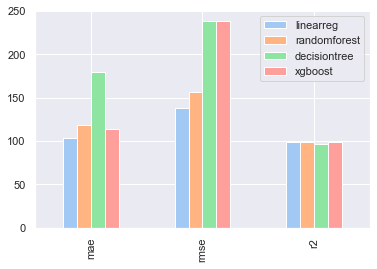

In [103]:
error_rec = {
    "linearreg": {
        "mae": mae_linear,
        "rmse": rmse_linear,
        'r2': rsq_linear*100
    },
    "randomforest": {
        "mae": mae_rf,
        "rmse": rmse_rf,
        'r2': rsq_rf*100
    },
    "decisiontree": {
        "mae": mae_dt,
        "rmse": rmse_dt,
        'r2': rsq_dt*100
    },
    "xgboost": {
        "mae": mae_xgb,
        "rmse": rmse_xgb,
        'r2': rsq_xgb*100
    },
}
pd.DataFrame(error_rec).plot(kind="bar", 
             color=[
                 sns.color_palette("pastel")[0], 
                 sns.color_palette("pastel")[1], 
                 sns.color_palette("pastel")[2], 
                 sns.color_palette("pastel")[3]]);


# Hyperparameter Tuning

crossvalidation, RepeatedKFold and GridSearchCV are the popular methods for Parameter Tuning

We have only tuned the model for K values, plus an addition model parameter. With greater processor, the tuning can afford to produce folds 3 times over 4 parameter values 
>Another alternative is:
> <span style="color: purple"><b> TuneSearchCV </b></span>

In [104]:
cv = RepeatedKFold(n_splits= 50, n_repeats = 3, random_state = 1)
fs_info_v0 = SelectKBest(score_func = mutual_info_regression)


# define pipeline for each algorithm
# define GSCV for each
# loop through it


pipe_lr = Pipeline([
    ('sel', fs_info_v0), 
    ('model', LinearRegression())
])

pipe_rf = Pipeline([
    ('sel', fs_info_v0), 
    ('model', RandomForestRegressor(random_state=1))
])

pipe_dtree = Pipeline([
    ('sel', fs_info_v0), 
    ('model', DecisionTreeRegressor(random_state=1))
])

pipe_xgb = Pipeline([
    ('sel', fs_info_v0), 
    ('model', XGBRegressor(random_state=1))
])

# pipe_lr.get_params().keys()

In [105]:
param_range = [15, 18, 10]
param_range_fl = [5.0, 10.0]

grid_params_lr = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        }] 


grid_params_rf = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
        'model__criterion': ['mse', 'mae'],
#         'model__max_depth': param_range,
#         'model__min_samples_split': param_range[1:]
                  }]


grid_params_dtree = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
                    'model__criterion': ['mse', 'mae'],
#                      'model__max_depth': param_range,
#                      'model__max_features': ['auto', 'sqrt']
                     }]


grid_params_xgb = [{'sel__k': [i for i in range(X_train_fs.shape[1]-6, X_train_fs.shape[1]-4)],
#                     'model__max_depth': [9,12],
#                    'model__min_child_weight': [7,8],
                   'model__subsample': [i/10. for i in range(9,11)]
                   }]



LR = GridSearchCV(estimator=pipe_lr,
            param_grid=grid_params_lr,
            scoring='neg_mean_absolute_error',
            cv=cv)

RF = GridSearchCV(estimator=pipe_rf,
            param_grid=grid_params_rf,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

DT = GridSearchCV(estimator=pipe_dtree,
            param_grid=grid_params_dtree,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

XGB = GridSearchCV(estimator=pipe_xgb,
            param_grid=grid_params_xgb,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)

grids = [LR,RF,XGB,DT]

# Creating a dict for our reference
grid_dict = {0: 'Linear Regression', 
        1: 'Random Forest',
        2: 'XGBoost',
        3: 'Decision Tree'}

In [106]:
# store the error values in a dataframe and plot as evaluation visualization also see boosted DTree and R2 square values

In [107]:
# Start form initial scaled model: X_train17 and X_test17, y_train17 and y_test17
def extract_best_model(grids: list, grid_dict: dict):
    print('Performing model optimizations...')
    least_mae = 270817
    best_regr = 0
    best_gs = ''
    for idx, gs in enumerate(grids):
        print('\nEstimator: %s' % grid_dict[idx])
        gs.fit(X_train_fs, y_train)
        print('Best Config: %s' % gs.best_params_)
        # Best training data accuracy
        print('Best MAE: %.3f' % gs.best_score_)
        # Predict on test data with best params
        y_pred_v0 = gs.predict(X_test_fs)
        # Test data accuracy of model with best params
        print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v0))
        print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v0)))
        
        # Track best (least test error) model
        if mean_absolute_error(y_test, y_pred_v0) < least_mae:
            least_mae = mean_absolute_error(y_test, y_pred_v0)
            best_gs = gs
            best_regr = idx
    print('\nClassifier with least test set MAE: %s' % grid_dict[best_regr])

    
    ########### summarize all values of parameters (uncomment only if nescessary)
    ######### means = results.cv_results_['mean_test_score']
    ######## params = results.cv_results_['params']
    ####### for mean, param in zip(means, params):
    ###### print(">%.3f with: %r" % (mean, param))
    
    return (grid_dict[best_regr], best_gs, least_mae)

# Prediction and Evaluation

**Running the GridSearchCV and saving the best model.**

In [108]:
best_model_name_v0, best_model_v0, least_mae_v0 = extract_best_model(grids= grids, grid_dict = grid_dict)

print(f"Best Model: {best_model_name_v0}")
print(f"Error Rate: {least_mae_v0}")
print(best_model_v0)

Performing model optimizations...

Estimator: Linear Regression
Best Config: {'sel__k': 4}
Best MAE: -116.867
Test set mean absolute error for best params: 127.375 
Test set root mean squared error for best params: 11.286 

Estimator: Random Forest
Best Config: {'model__criterion': 'mse', 'sel__k': 4}
Best MAE: -130.967
Test set mean absolute error for best params: 130.067 
Test set root mean squared error for best params: 11.405 

Estimator: XGBoost
Best Config: {'model__subsample': 0.9, 'sel__k': 4}
Best MAE: -137.503
Test set mean absolute error for best params: 135.459 
Test set root mean squared error for best params: 11.639 

Estimator: Decision Tree
Best Config: {'model__criterion': 'mse', 'sel__k': 4}
Best MAE: -175.420
Test set mean absolute error for best params: 177.971 
Test set root mean squared error for best params: 13.341 

Classifier with least test set MAE: Linear Regression
Best Model: Linear Regression
Error Rate: 127.3749731577997
GridSearchCV(cv=RepeatedKFold(n_re

<p style="font-size: 17px;"> Although Linear Regression is the best of the listed models, <b>RandomForest</b> would potentially produce closer precise results, due to good learning rate, hence I would retune it in addition to the best params extracted in the first search </p>

In [109]:


grid_params_rf1 = [{
        'model__max_depth': param_range,
        'model__min_samples_split': [2,5]
                  }]

RF1 = GridSearchCV(
    estimator = Pipeline([
                    ('sel', SelectKBest(score_func=mutual_info_regression, k=8)), 
                    ('model', RandomForestRegressor(random_state=1, criterion='mse'))
                ]),
            param_grid=grid_params_rf1,
            scoring='neg_mean_absolute_error',
            cv=cv, 
            n_jobs= -1)


print("Random Forest V-1 optimising...")
RF1.fit(X_train_fs, y_train)
print('Best Config: %s' % RF1.best_params_)
print('Best MAE: %.3f' % RF1.best_score_)
y_pred_v1_rf1 = RF1.predict(X_test_fs)
print('Test set mean absolute error for best params: %.3f ' % mean_absolute_error(y_test, y_pred_v1_rf1))
print('Test set root mean squared error for best params: %.3f ' % np.sqrt(mean_absolute_error(y_test, y_pred_v1_rf1)))
        

Random Forest V-1 optimising...
Best Config: {'model__max_depth': 10, 'model__min_samples_split': 2}
Best MAE: -120.603
Test set mean absolute error for best params: 116.359 
Test set root mean squared error for best params: 10.787 


### Save the models for backup in pickle files

# Model Explainability (Explainable AI)

we have two models `RF1` and `best_model_v0` which is random forest and xgboost trained on the test set. we will visualize the model behavior and explainability.

[Shap Tree Explainer](https://shap.readthedocs.io/en/stable/example_notebooks/tabular_examples/tree_based_models/Fitting%20a%20Linear%20Simulation%20with%20XGBoost.html) has the code docs

In [110]:
# in the above cells, fit the model with the returned params from the gsearchCV
# and then passit to the shap arguements

fs_rf = SelectKBest(score_func=mutual_info_regression, k=8)
fs_rf.fit(X_train,y_train)
X_train_rf = fs_rf.transform(X_train)
X_test_rf = fs_rf.transform(X_test)
rf_final = RandomForestRegressor(max_depth = 15, min_samples_split = 2, criterion = 'mse')

rf_final.fit(X_train_rf, y_train)
rf_pred = rf_final.predict(X_test_rf)

In [111]:
print(mean_absolute_error(y_test, rf_pred))
print(np.sqrt(mean_squared_error(y_test, rf_pred)))

117.1083297493484
155.36132351245698


In [112]:
# fs.get_support() will return boolean values in a list, with True at the 'k' specific selected features

feature_columns = [X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]]
feature_columns

['clonesize',
 'osmia',
 'AverageOfUpperTRange',
 'AverageOfLowerTRange',
 'AverageRainingDays',
 'fruitset',
 'fruitmass',
 'seeds']

In [113]:
# using the above line of code to create a dataframe
# fs.transform will return the np.array() values and fs.get_support() will have the columns

pd.DataFrame(X_test_rf, columns=[X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]])

,clonesize,osmia,AverageOfUpperTRange,AverageOfLowerTRange,AverageRainingDays,fruitset,fruitmass,seeds
0,25.0,0.50,79.0,55.9,0.10,0.477832,0.439279,34.878927
1,12.5,0.38,71.9,50.8,0.39,0.500184,0.445340,35.505646
2,25.0,0.75,58.2,41.2,0.56,0.449875,0.413097,33.239806
3,25.0,0.63,64.7,45.8,0.26,0.504761,0.451905,36.415657
4,12.5,0.50,71.9,50.8,0.26,0.615612,0.510575,43.293984
...,...,...,...,...,...,...,...,...
248,25.0,0.25,64.7,45.8,0.10,0.502622,0.454522,36.617049
249,12.5,0.50,64.7,45.8,0.39,0.598814,0.498586,41.730667
250,25.0,0.50,58.2,41.2,0.26,0.494678,0.429703,34.784888
251,12.5,0.50,64.7,45.8,0.26,0.611463,0.504717,42.508522


In [114]:
# Creating dataframe for test set of attributes, so that feature columns can be visible in the plot

X_test_rf_df = pd.DataFrame(X_test_rf, columns=[X.columns[i] for i in range(len(fs_rf.get_support())) if fs_rf.get_support()[i]])

shap_values = shap.TreeExplainer(rf_final).shap_values(X_test_rf_df)
shap_interaction_values = shap.TreeExplainer(rf_final).shap_interaction_values(X_test_rf_df)

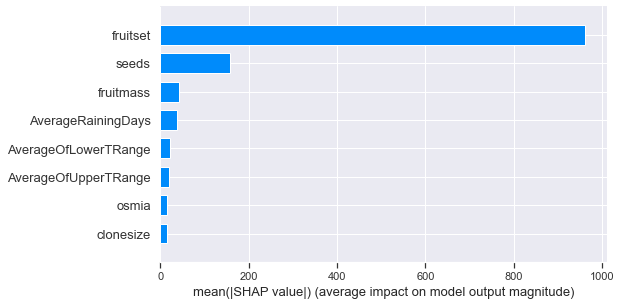

In [115]:
# summary plot of XGB test set as the impact value
shap.summary_plot(shap_values, X_test_rf_df, plot_type="bar")

We can see if the **fruitset value decreases, it doesn't affect the yield value**,
while if it **increases**, it will **overpower** the other impacts

**Other features** has comparitively ***high*** tolerance value. If there is -1 rainy days, then it will have a higher value, while for **range of +/-2**, the impact drops ***low***

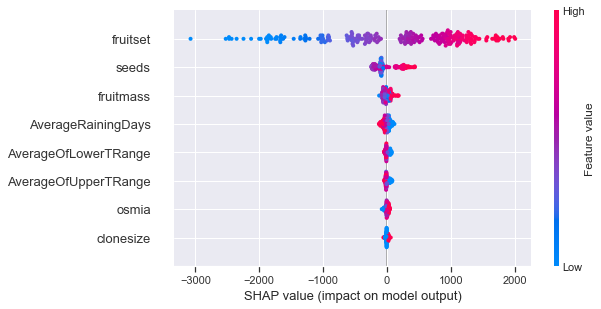

In [116]:
# BeeSwarm plot of the features based on impact on specific values

shap.summary_plot(shap_values, X_test_rf_df)

In [117]:
shap.initjs()

shap.force_plot(shap.TreeExplainer(rf_final).expected_value, shap_values[50,0:-3], X_test_rf_df.iloc[50,0:-3])

### From the data of  <span style="color: forestgreen;">105 to 150 +/- 30</span>, the test set values have balanced impact on the yield, otherwise, it is overpowerd by the fruitset value or the other

In [118]:
shap.force_plot(shap.TreeExplainer(rf_final).expected_value, shap_values[0:257,:], X_test_rf_df.iloc[0:257,:])

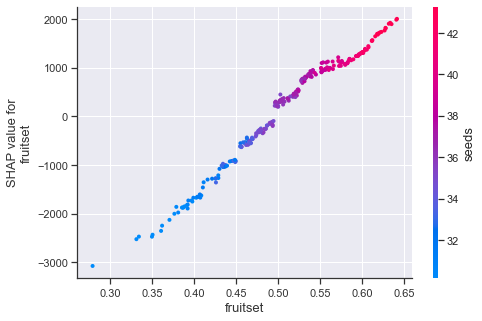

In [119]:
shap.dependence_plot(5, shap_values, X_test_rf_df) # should be 1-7 as we have 8 features

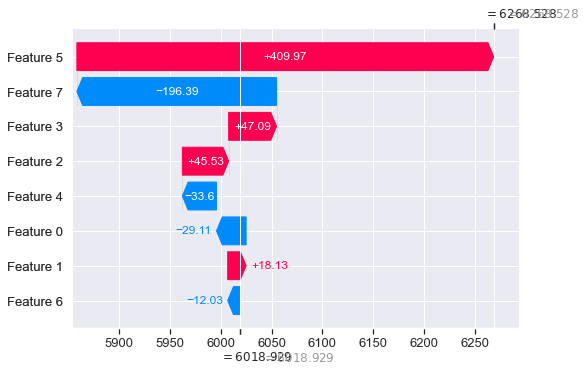

In [120]:
row = 111
shap.plots._waterfall.waterfall_legacy(shap.TreeExplainer(rf_final).expected_value[0], shap_values[row])

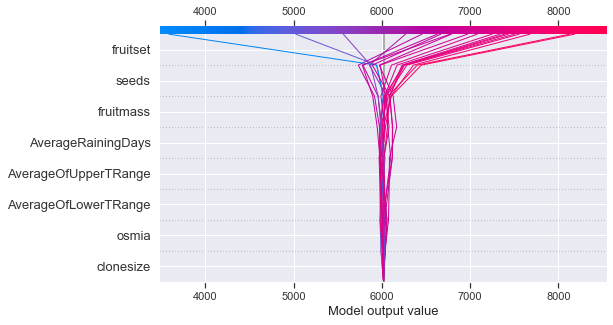

In [121]:
shap.decision_plot(shap.TreeExplainer(rf_final).expected_value[0], shap_values[110:130], feature_columns)

# Saving Models and Backup Objects



In [122]:
# Save best grid search pipeline to file
dump_file_name = 'lreg_bbry_tuned_model.pkl'
joblib.dump(best_model_v0, dump_file_name, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % (best_model_name_v0, dump_file_name))
    
# Save the random forest grid search pipleline for backup
dump_file_name1 = 'rf_bbry_tuned_model.pkl'
joblib.dump(rf_final, dump_file_name1, compress=1)
print('\nSaved %s tuned model to directory by name: %s' % ("Random Forest", dump_file_name1))


Saved Linear Regression tuned model to directory by name: lreg_bbry_tuned_model.pkl

Saved Random Forest tuned model to directory by name: rf_bbry_tuned_model.pkl


In [123]:
# # Save feature selection objects for backup
joblib.dump(fs_rf, "rf_fs_object.joblib", compress=1)
print("\n Saved %s to %s" % ("Randomforest fs object", "rf_fs_object.joblib"))


X_test_rf_df.to_csv("X_test_rf_df.csv")
print("\nSaved X_test for RF to CSV")

joblib.dump(X_train_rf, "X_train_rf.joblib")
print("\n Saved X_train for RF to joblib file")



 Saved Randomforest fs object to rf_fs_object.joblib

Saved X_test for RF to CSV

 Saved X_train for RF to joblib file


In [124]:
pd.read_csv("X_test_rf_df.csv", index_col=0).iloc[110].values

array([25.        ,  0.5       , 64.7       , 45.8       ,  0.26      ,
        0.53860419,  0.46876313, 38.3177098 ])

In [125]:
# # Save the target test set
joblib.dump(y_test, "y_test.joblib", compress=1)
print("\nSaved y_test to joblib file")


Saved y_test to joblib file


<Figure size 648x936 with 0 Axes>

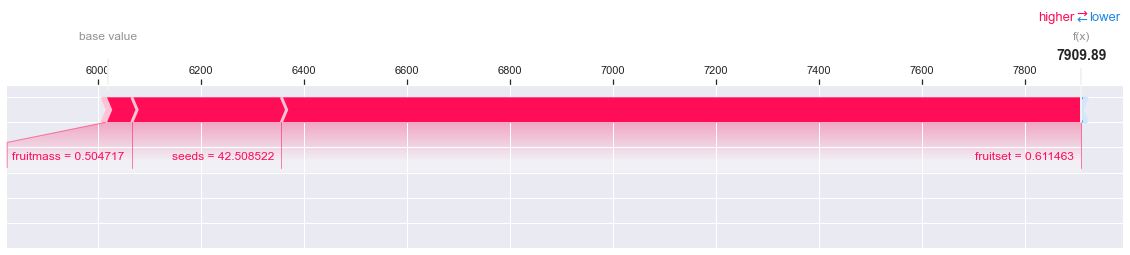

In [126]:
# # Saving png plot image. bbox_inches='tight' will prevent cropping the image

plt.figure(figsize=(9,13))
shap.force_plot(shap.TreeExplainer(rf_final).expected_value, #pass the model
                shap.TreeExplainer(rf_final).shap_values(np.array([12.5, 0.50, 64.7, 45.8, 0.26, 0.611463, 0.504717, 42.508522]).reshape(1,-1)), #pass query, will give the prediction
                np.array([12.5, 0.50, 64.7, 45.8, 0.26, 0.611463, 0.504717, 42.508522]).reshape(1,-1),
                feature_names=feature_columns,
               show=False,
               matplotlib=True).savefig("test_force_plot1.png", bbox_inches = 'tight') # pass the query in form of dataframe